Donus 기부 데이터 분석
환경: conda(dl) python+pandas+matplotlib
목표:
- Pandas 기본 기능 숙달  
- 데이터 구조 이해 (DataFrame 중심)  
- Donus 스타일의 기부 데이터 분석 실습  
- 시각화(그래프) 및 기본 인사이트 도출  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


In [4]:
# Donus 서비스와 유사한 기부 데이터 생성
data = {
    "donor_id": np.random.randint(1000, 1200, 300),        # 기부자 ID
    "amount": np.random.randint(5000, 200000, 300),        # 기부 금액
    "campaign": np.random.choice(
        ["아동 교육", "노인 돌봄", "유기동물 지원", "문화 예술"], 300
    ),                                                     # 기부 캠페인 종류
    "payment_method": np.random.choice(
        ["카드", "계좌이체", "자동이체"], 300
    ),                                                     # 결제 방식
    "date": pd.date_range("2024-01-01", periods=300, freq="D")  # 날짜
}

In [5]:
df = pd.DataFrame(data)
df.head(10)

,donor_id,amount,campaign,payment_method,date
0,1159,11540,문화 예술,자동이체,2024-01-01
1,1117,124924,노인 돌봄,계좌이체,2024-01-02
2,1199,47589,문화 예술,계좌이체,2024-01-03
3,1048,194575,문화 예술,자동이체,2024-01-04
4,1109,137255,아동 교육,계좌이체,2024-01-05
5,1013,85116,유기동물 지원,자동이체,2024-01-06
6,1061,181698,유기동물 지원,계좌이체,2024-01-07
7,1004,7560,아동 교육,계좌이체,2024-01-08
8,1033,169308,유기동물 지원,자동이체,2024-01-09
9,1118,139897,유기동물 지원,카드,2024-01-10


In [18]:
df.info() # 데이터 기본 정보 확인
df.describe() # 수치형 통계 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   donor_id        300 non-null    int32         
 1   amount          300 non-null    int32         
 2   campaign        300 non-null    object        
 3   payment_method  300 non-null    object        
 4   date            300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 9.5+ KB


,donor_id,amount,date
count,300.000000,300.000000,300
mean,1100.096667,106759.793333,2024-05-29 12:00:00
min,1000.000000,6040.000000,2024-01-01 00:00:00
25%,1052.750000,58769.000000,2024-03-15 18:00:00
50%,1101.000000,110625.000000,2024-05-29 12:00:00
75%,1144.000000,152447.750000,2024-08-12 06:00:00
max,1199.000000,198540.000000,2024-10-26 00:00:00
std,54.942603,53900.838788,NaN


In [6]:
# 캠페인별 총 기부 금액 계산
campaign_sum = df.groupby("campaign")["amount"].sum()
campaign_sum

campaign
노인 돌봄      7066020
문화 예술      7990243
아동 교육      6859608
유기동물 지원    8957686
Name: amount, dtype: int32

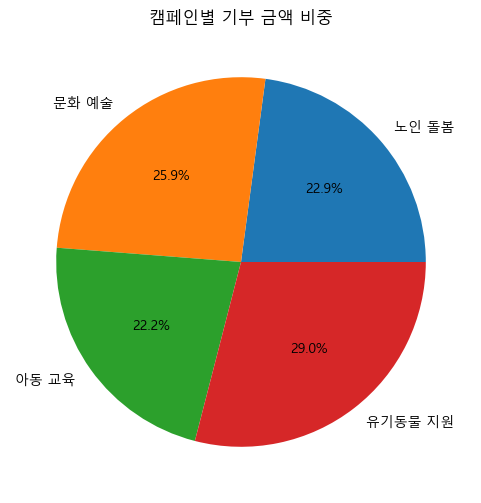

In [7]:
campaign_sum.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6, 6)
)

plt.title("캠페인별 기부 금액 비중")
plt.ylabel("")
plt.show()


In [8]:
# 결제 방식별 평균 기부 금액
df.groupby("payment_method")["amount"].mean()

payment_method
계좌이체    108876.287129
자동이체     97853.617391
카드      102665.309524
Name: amount, dtype: float64

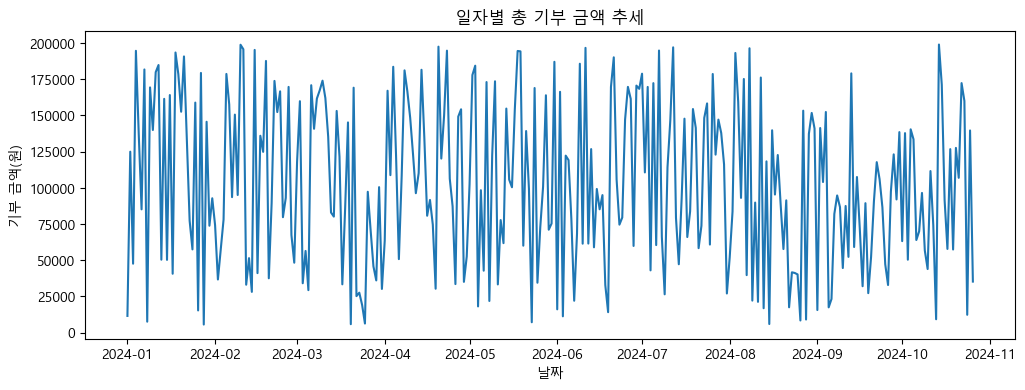

In [9]:
# 날짜별 총 기부 금액 계산
daily_sum = df.groupby("date")["amount"].sum()
plt.figure(figsize=(12, 4))
plt.plot(daily_sum)

plt.title("일자별 총 기부 금액 추세")
plt.xlabel("날짜")
plt.ylabel("기부 금액(원)")
plt.show()
